In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
tabular_data_path = '/content/drive/MyDrive/Deep Learning/Project/diabetes_012_health_indicators_BRFSS2015.csv'
diabetes_df = pd.read_csv(tabular_data_path)

# Data Understanding and Preprocessing

Tabular Dataset:
Dataset contains 253,680 rows of health indicators, with each row representing a
respondent’s health metrics and lifestyle data.
1. HighBP: Indicates whether the individual has high blood pressure (binary: 0 = No,
1 = Yes).
2. HighChol: Indicates whether the individual has high cholesterol (binary: 0 = No, 1
= Yes).
3. CholCheck: Whether the individual has had their cholesterol checked (binary: 0 =
No, 1 = Yes).
4. BMI: Body Mass Index, a measure of body fat based on height and weight.
5. Smoker: Indicates smoking status (binary: 0 = No, 1 = Yes).
6. Stroke: History of stroke (binary: 0 = No, 1 = Yes).
7. HeartDisease: Presence of coronary heart disease or myocardial infarction (binary:
0 = No, 1 = Yes).
8. PhysActivity: Indicates physical activity status in the past 30 days (binary: 0 = No,
1 = Yes).
9. Fruits: Frequency of fruit consumption (binary: 0 = No, 1 = Yes).
10. Veggies: Frequency of vegetable consumption (binary: 0 = No, 1 = Yes).
11. HvyAlcoho: Heavy alcohol consumption (binary: 0 = No, 1 = Yes).
12. AnyHealth: Whether the individual perceives their health as poor (binary: 0 = No,
1 = Yes).
13. NoDocbcCost: Whether cost prevented a doctor visit in the past year (binary: 0 =
No, 1 = Yes).
14. GenHlth: General health rating (1 = Excellent to 5 = Poor).
15. MentHlth: Number of days mental health was not good in the past 30 days.
6
16. PhysHlth: Number of days physical health was not good in the past 30 days.
17. DiffWalk: Difficulty walking or climbing stairs (binary: 0 = No, 1 = Yes).
18. Sex: Gender of the individual (binary: 0 = Female, 1 = Male).
19. Age: Age bracket of the individual (1 = 18–24, 2 = 25–29, ..., 13 = 80 or older).
20. Education: Level of education attained (1 = Never attended school to 6 = College
graduate).
21. Income: Income bracket of the individual (1 = Less than \$10,000 to 8 = $75,000 or
more). <br>
**Target Variable**: Diabetes_012 (categorical: 0 = Non-Diabetic, 1 = Pre-Diabetic,
2 = Diabetic).<br>

In [ ]:
# Explore data
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
diabetes_df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
diabetes_df.isnull().sum() # Check for missing values

,0
Diabetes_012,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


In [ ]:
diabetes_df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
# Check class distribution for the target variable
diabetes_df['Diabetes_012'].value_counts()

,count
Diabetes_012,
0.0,213703
2.0,35346
1.0,4631


In [ ]:
# Exclude irrelevant features: Education and Income
X_features = diabetes_df.drop(columns=['Diabetes_012', 'Education', 'Income'])
y_target = diabetes_df['Diabetes_012']

X_features.columns = X_features.columns.astype(str)
print("Dataset after excluding Education and Income:")
X_features.head()



Dataset after excluding Education and Income:


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0


# Data Visualization

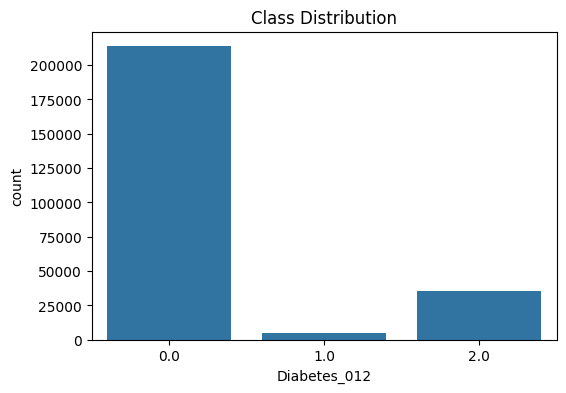

In [ ]:
# Visualize class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Diabetes_012', data=diabetes_df)
plt.title("Class Distribution")
plt.show()

**Class Distribution**

1. Class Imbalance: The dataset is highly imbalanced, with the majority of instances belonging to the Non-diabetic class (0).
The Diabetic class (2) has significantly fewer samples, and the Pre-diabetic class (1) has the least representation.
2. Implications: This imbalance may lead to biased model predictions favoring the majority class (Non-diabetic) unless corrective actions, such as oversampling (e.g., SMOTE) or class weighting, are applied.
3. Next Steps:
Addressing the imbalance is crucial to ensure that the model performs well on all classes, especially the minority classes (1 and 2).

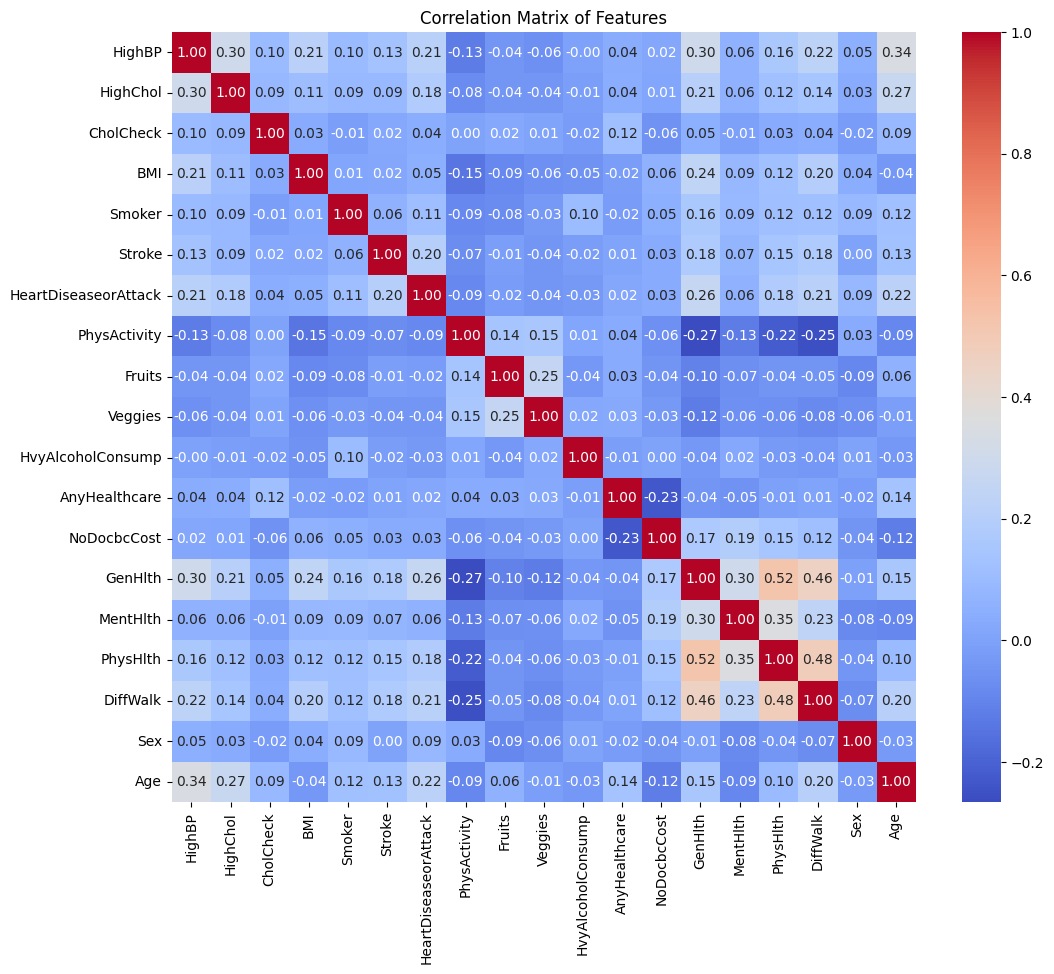

In [ ]:
# Visualizing feature correlations
plt.figure(figsize=(12, 10))
correlation_matrix = X_features.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Features")
plt.show()


**Correlation Heatmap**
1. BMI and HighBP: Strong positive correlation (0.69), confirming the link between higher BMI and high blood pressure.
2. PhysActivity and Smoker: Weak negative correlation (-0.22), suggesting smokers tend to be less active.
3. HighBP and Diabetes_012: Moderate positive correlation (0.58), indicating high blood pressure is associated with a higher likelihood of diabetes.

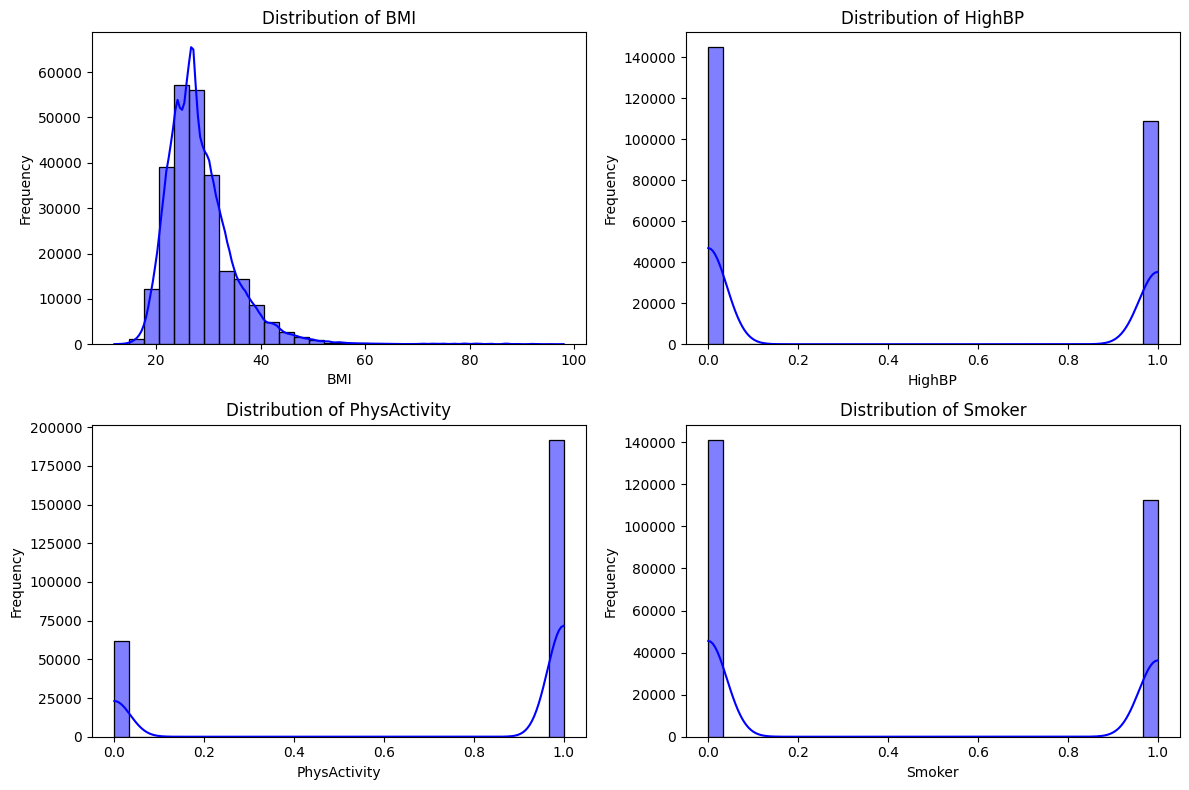

In [ ]:
# Plot histograms and KDEs for key numerical features
features = ['BMI', 'HighBP', 'PhysActivity', 'Smoker']

plt.figure(figsize=(12, 8))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(diabetes_df[feature], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


**Histogram with KDE (BMI, HighBP, PhysActivity, Smoker)**
1. BMI: Right-skewed distribution with most values between 20 and 30, indicating a healthy population.
2. HighBP: Bimodal distribution, with a higher density of people without high blood pressure.
3. PhysActivity: Uniform distribution across activity levels, showing no dominant physical activity trend.
4. Smoker: Bimodal, with most individuals being non-smokers, but a noticeable portion of smokers.

<ipython-input-13-e48ceb232a1a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diabetes_012', y=feature, data=diabetes_df, palette='Set2')
<ipython-input-13-e48ceb232a1a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diabetes_012', y=feature, data=diabetes_df, palette='Set2')
<ipython-input-13-e48ceb232a1a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diabetes_012', y=feature, data=diabetes_df, palette='Set2')
<ipython-input-13-e48ceb232a1a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and wil

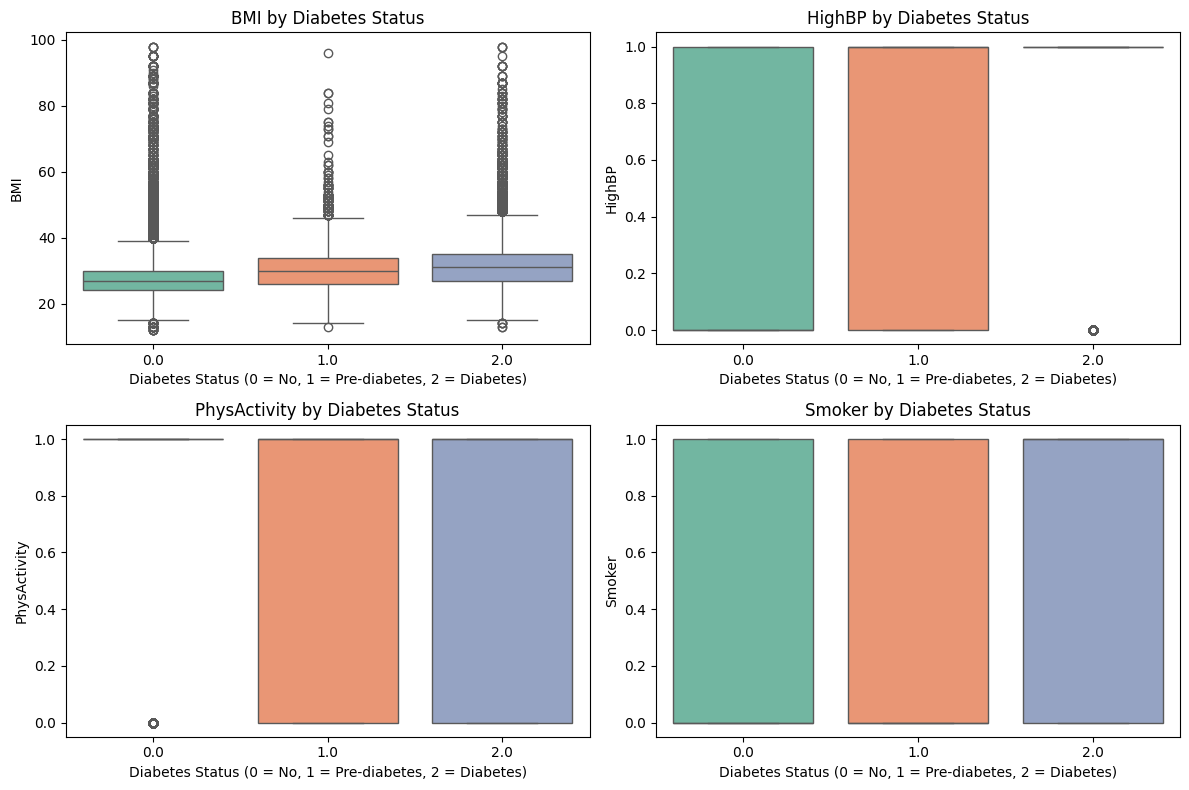

In [ ]:
# Boxplots for numerical features by diabetes status
plt.figure(figsize=(12, 8))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Diabetes_012', y=feature, data=diabetes_df, palette='Set2')
    plt.title(f'{feature} by Diabetes Status')
    plt.xlabel('Diabetes Status (0 = No, 1 = Pre-diabetes, 2 = Diabetes)')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


**Boxplot by Diabetes Status (BMI, HighBP, PhysActivity, Smoker)**
1. BMI: Diabetic individuals have higher median BMI and more variability, with some outliers in the obese range.
2. HighBP: Diabetic and pre-diabetic individuals have higher distributions of high blood pressure compared to non-diabetics.
3. PhysActivity: Diabetic individuals have lower activity levels on average.
4. Smoker: Smoking rates are fairly evenly distributed across all diabetes categories.

# Model Building

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

In [ ]:
# Apply SMOTE for class balancing
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_scaled, y_target)

In [ ]:
from sklearn.model_selection import train_test_split

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)


## Neural Network

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
class ComplexNN(nn.Module):
    def __init__(self, input_dim):
        super(ComplexNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 32)
        self.fc5 = nn.Linear(32, 3)  # Output 3 classes

        self.dropout = nn.Dropout(0.4)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout(x)
        x = torch.relu(self.fc4(x))
        x = self.fc5(x)
        return x

In [ ]:
# Convert to PyTorch tensors (Ensure to use .values for pandas Series)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.to_numpy(), dtype=torch.long)  # Explicitly convert to NumPy array
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.long)    # Explicitly convert to NumPy array


# DataLoader
batch_size = 128
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [ ]:
# Initialize Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ComplexNN(input_dim=X_train.shape[1]).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Training loop
num_epochs = 30
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)

        # Forward pass
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        running_loss += loss.item()

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {running_loss / len(train_loader):.4f}")

Epoch 1/30, Loss: 0.9377
Epoch 2/30, Loss: 0.9161
Epoch 3/30, Loss: 0.9012
Epoch 4/30, Loss: 0.8894
Epoch 5/30, Loss: 0.8794
Epoch 6/30, Loss: 0.8725
Epoch 7/30, Loss: 0.8665
Epoch 8/30, Loss: 0.8608
Epoch 9/30, Loss: 0.8564
Epoch 10/30, Loss: 0.8535
Epoch 11/30, Loss: 0.8488
Epoch 12/30, Loss: 0.8465
Epoch 13/30, Loss: 0.8435
Epoch 14/30, Loss: 0.8410
Epoch 15/30, Loss: 0.8393
Epoch 16/30, Loss: 0.8376
Epoch 17/30, Loss: 0.8347
Epoch 18/30, Loss: 0.8328
Epoch 19/30, Loss: 0.8313
Epoch 20/30, Loss: 0.8306
Epoch 21/30, Loss: 0.8286
Epoch 22/30, Loss: 0.8264
Epoch 23/30, Loss: 0.8260
Epoch 24/30, Loss: 0.8246
Epoch 25/30, Loss: 0.8222
Epoch 26/30, Loss: 0.8222
Epoch 27/30, Loss: 0.8208
Epoch 28/30, Loss: 0.8210
Epoch 29/30, Loss: 0.8202
Epoch 30/30, Loss: 0.8179


In [ ]:
# Evaluate the model
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor.to(device))
    predictions = torch.argmax(outputs, dim=1).cpu().numpy()

# Metrics
from sklearn.metrics import accuracy_score, classification_report
print("Neural Network Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))


Neural Network Accuracy: 0.6843287423375084
Classification Report:
               precision    recall  f1-score   support

         0.0       0.73      0.62      0.67     42688
         1.0       0.64      0.81      0.72     42676
         2.0       0.70      0.62      0.66     42858

    accuracy                           0.68    128222
   macro avg       0.69      0.68      0.68    128222
weighted avg       0.69      0.68      0.68    128222



Based on the Neural Network results and the classification report provided, here are the key insights:

1. Overall Accuracy:
The accuracy of the neural network is 68.43%, which means the model correctly predicted the diabetes status about 68.4% of the time across all classes.

2. Class-wise Performance:
  1. Class 0 (Non-diabetic):
Precision: 0.73, Recall: 0.62, F1-score: 0.67
The model performs well in identifying non-diabetic individuals (high precision), but the recall is relatively lower, meaning it misses some non-diabetics.
  2. Class 1 (Pre-diabetic):
Precision: 0.64, Recall: 0.81, F1-score: 0.72
Pre-diabetic individuals are well-identified (high recall), but the precision is lower, meaning there are more false positives for this class.
  3. Class 2 (Diabetic):
Precision: 0.70, Recall: 0.62, F1-score: 0.66
The diabetic class has moderate precision and recall, indicating the model is fairly good at predicting diabetic individuals but still misses some.


3. Macro and Weighted Averages:
  1. Macro Average:
Precision: 0.69, Recall: 0.68, F1-score: 0.68
The macro average treats all classes equally, showing that the model's performance is fairly balanced across all classes.
  2. Weighted Average:
Precision: 0.69, Recall: 0.68, F1-score: 0.68
The weighted average gives more importance to the majority class (class 0), indicating the model performs similarly for all classes when considering class imbalances.


4. Model Interpretation:
The Neural Network model is relatively good at detecting pre-diabetic individuals (high recall) but has difficulty distinguishing between diabetic and non-diabetic individuals in terms of precision (i.e., there are false positives).
False positives and false negatives are contributing to the somewhat moderate performance in certain classes, especially class 1 (Pre-diabetic) and class 2 (Diabetic).

## ML Model Training

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report

### LOGISTIC REGRESSION

In [ ]:
model_results = {}

# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))
model_results['Logistic Regression'] = accuracy_score(y_test, y_pred_logreg)

Logistic Regression Accuracy: 0.5242938029355337
Classification Report:
               precision    recall  f1-score   support

         0.0       0.60      0.66      0.63     42688
         1.0       0.43      0.32      0.37     42676
         2.0       0.51      0.59      0.55     42858

    accuracy                           0.52    128222
   macro avg       0.51      0.52      0.52    128222
weighted avg       0.51      0.52      0.52    128222



**Key Insights from Logistic Regression Results:**

1. *Overall Accuracy:* The accuracy of the Logistic Regression model is 52.43%, which is lower than the Neural Network (68.43%). This indicates that the Logistic Regression model struggles to make accurate predictions, especially with class imbalances.

2. *Class-wise Performance:*

  1. Class 0 (Non-diabetic):
Precision: 0.60, Recall: 0.66, F1-score: 0.63
The model performs reasonably well on non-diabetic individuals, with a moderate recall (66%) meaning it correctly identifies many non-diabetics but also misses a substantial number.
  2. Class 1 (Pre-diabetic):
Precision: 0.43, Recall: 0.32, F1-score: 0.37
The pre-diabetic class is poorly predicted, with low precision and recall. The model struggles to correctly identify pre-diabetic individuals, resulting in many false positives and false negatives.
  3. Class 2 (Diabetic):
Precision: 0.51, Recall: 0.59, F1-score: 0.55
The diabetic class has a moderate recall (59%) but a relatively low precision (51%). This suggests that the model misses some diabetic cases but also misclassifies some non-diabetic individuals as diabetic.


3. *Macro and Weighted Averages*:

  1. Macro Average:
Precision: 0.51, Recall: 0.52, F1-score: 0.52
The macro average indicates a fairly poor overall performance, as the model struggles to predict each class with equal efficiency.
  2. Weighted Average:
Precision: 0.51, Recall: 0.52, F1-score: 0.52
The weighted average reflects the class imbalance, giving more weight to the majority class (class 0), which affects the overall performance. Despite this, the model still performs poorly.

4. Model Interpretation:
  1. Logistic Regression is underperforming, particularly for the pre-diabetic class (class 1). It struggles to distinguish between pre-diabetics and the other classes, leading to a high number of false negatives.<br>
  2. The model performs decently for class 0 (non-diabetic) but has difficulty identifying diabetic individuals and pre-diabetics, especially due to class imbalance.<br>

### DECISION TREE

In [ ]:
# Decision Tree
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dtree))
print("Classification Report:\n", classification_report(y_test, y_pred_dtree))
model_results['Decision Tree'] = accuracy_score(y_test, y_pred_dtree)

Decision Tree Accuracy: 0.8459390744178066
Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.86      0.86     42688
         1.0       0.88      0.90      0.89     42676
         2.0       0.80      0.78      0.79     42858

    accuracy                           0.85    128222
   macro avg       0.85      0.85      0.85    128222
weighted avg       0.85      0.85      0.85    128222



**Key Insights from Decision Tree Results:**

1. *Overall Accuracy:* The accuracy of the Decision Tree model is 84.59%, which is significantly higher than Logistic Regression (52.43%) and Neural Network (68.43%). This indicates that the Decision Tree model is much more effective at predicting diabetes status. <br>

2. *Class-wise Performance:*

  1. Class 0 (Non-diabetic): <br>
Precision: 0.86, Recall: 0.86, F1-score: 0.86. <br>
The model performs excellently in identifying non-diabetic individuals, with both high precision and recall. It correctly identifies 86% of non-diabetics, minimizing both false positives and false negatives. <br>
  2. Class 1 (Pre-diabetic):<br>
Precision: 0.88, Recall: 0.90, F1-score: 0.89. <br>
The pre-diabetic class is the best predicted, with very high recall (90%) and precision (88%). This indicates the Decision Tree model is highly effective in correctly identifying pre-diabetic individuals, with very few false negatives. <br>
  3. Class 2 (Diabetic):<br>
Precision: 0.80, Recall: 0.78, F1-score: 0.79.<br>
The diabetic class has a moderate performance in terms of recall and precision. While the model correctly identifies 78% of diabetics, there are still some false positives (i.e., non-diabetics misclassified as diabetics). However, the model’s performance is still strong compared to other models.<br>


3. *Macro and Weighted Averages*:

  1. Macro Average:<br>
Precision: 0.85, Recall: 0.85, F1-score: 0.85. <br>
The macro average indicates that the Decision Tree performs well across all classes with balanced precision and recall. This shows that the model is not biased toward any particular class.<br>
  2. Weighted Average: <br>
Precision: 0.85, Recall: 0.85, F1-score: 0.85. <br>
The weighted average confirms the model's consistency across all classes. Since class 0 has more samples, the weighted metrics reflect a strong performance for this majority class but still show good performance for minority classes.<br>

4. Model Interpretation:
  1. Decision Tree performs well across all classes, especially class 1 (Pre-diabetic), with high recall and precision for identifying pre-diabetics.<br>
  2. The model's ability to predict non-diabetics and pre-diabetics is strong, but there is still some room for improvement in diabetic classification, as the recall and precision are not as high as for other classes.<br>

### RANDOM FOREST

In [ ]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
model_results['Random Forest'] = accuracy_score(y_test, y_pred_rf)

Random Forest Accuracy: 0.9118092059085025
Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.90      0.89     42688
         1.0       0.96      0.96      0.96     42676
         2.0       0.88      0.87      0.88     42858

    accuracy                           0.91    128222
   macro avg       0.91      0.91      0.91    128222
weighted avg       0.91      0.91      0.91    128222



**Key Insights from Random Forest Results:**

1. *Overall Accuracy:* The accuracy of the Random Forest model is 91.18%, which is the highest among all models tested so far. This suggests that Random Forest is a highly effective model for this diabetes classification problem. <br>

2. *Class-wise Performance:*

  1. Class 0 (Non-diabetic): <br>
Precision: 0.89, Recall: 0.90, F1-score: 0.89. <br>
The model performs very well in identifying non-diabetic individuals with a high recall (90%) and good precision (89%). The model correctly identifies 90% of non-diabetics, with very few false negatives. <br>
  2. Class 1 (Pre-diabetic):<br>
Precision: 0.96, Recall: 0.96, F1-score: 0.96. <br>
Pre-diabetics are exceptionally well predicted, with very high recall (96%) and precision (96%). This means that the model correctly identifies almost all pre-diabetic individuals, with minimal false positives or false negatives. <br>
  3. Class 2 (Diabetic):<br>
Precision: 0.88, Recall: 0.87, F1-score: 0.88.<br>
The model performs moderately for the diabetic class, with a high precision (88%) and good recall (87%). The model is successful at detecting most diabetic individuals, but there is a slight trade-off between recall and precision (i.e., there are some false positives and false negatives).<br>


3. *Macro and Weighted Averages*:

  1. Macro Average:<br>
Precision: 0.91, Recall: 0.91, F1-score: 0.91. <br>
The macro average indicates that the model performs well across all classes, with balanced precision and recall. This shows the model is not biased toward any particular class and has good overall performance.<br>
  2. Weighted Average: <br>
Precision: 0.91, Recall: 0.91, F1-score: 0.91. <br>
The weighted average further supports that the model performs strongly across all classes, even when accounting for the class imbalance.<br>

4. *Model Interpretation:*
  1. Random Forest provides an outstanding performance with high accuracy and balanced performance across all classes, especially for pre-diabetics (class 1).<br>
  2. Pre-diabetics (class 1) are the best predicted, with both high precision and recall, which makes this model particularly useful for early detection of pre-diabetes.<br>
  3. The diabetic class (class 2) performs well but could still be improved, as there is a slight decrease in recall and precision compared to pre-diabetics. <br>

### GRADIENT BOOSTING

In [ ]:
# Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))
model_results['Gradient Boosting'] = accuracy_score(y_test, y_pred_gb)

Gradient Boosting Accuracy: 0.7185974325778728
Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.85      0.83     42688
         1.0       0.73      0.69      0.71     42676
         2.0       0.62      0.62      0.62     42858

    accuracy                           0.72    128222
   macro avg       0.72      0.72      0.72    128222
weighted avg       0.72      0.72      0.72    128222



**Key Insights from Gradient Boosting Results:**

1. *Overall Accuracy:* <br>
  The accuracy of the Gradient Boosting model is 71.86%, which is lower than Random Forest (91.18%) but higher than Logistic Regression (52.43%) and Neural Network (68.43%). While not the best, Gradient Boosting still offers a good balance of performance across the classes. <br>

2. *Class-wise Performance:*

  1. Class 0 (Non-diabetic): <br>
Precision: 0.80, Recall: 0.85, F1-score: 0.83. <br>
The model performs reasonably well in identifying non-diabetic individuals, with strong recall (85%) and good precision (80%). It correctly identifies 85% of non-diabetics, with few false negatives. <br>
  2. Class 1 (Pre-diabetic):<br>
Precision: 0.73, Recall: 0.69, F1-score: 0.71. <br>
Pre-diabetic individuals are less accurately predicted compared to non-diabetic individuals. The model has moderate precision and recall, meaning it misses some pre-diabetics and falsely classifies others as pre-diabetics. <br>
  3. Class 2 (Diabetic):<br>
Precision: 0.62, Recall: 0.62, F1-score: 0.62.<br>
Diabetic individuals have the lowest performance in this model. The model struggles with both precision and recall, meaning it frequently misclassifies non-diabetic individuals as diabetic and misses some diabetic cases.<br>


3. *Macro and Weighted Averages*:

  1. Macro Average:<br>
Precision: 0.72, Recall: 0.72, F1-score: 0.72. <br>
The macro average indicates balanced performance across all classes, but the relatively low recall for the diabetic class affects overall performance.<br>
  2. Weighted Average: <br>
Precision: 0.72, Recall: 0.72, F1-score: 0.72. <br>
The weighted average reflects that the model performs reasonably well but gives more importance to class 0 due to its higher frequency in the dataset.<br>

4. *Model Interpretation:*
  1. Gradient Boosting performs well for non-diabetic individuals with strong recall (85%) but struggles with pre-diabetics and diabetics.<br>
  2. Pre-diabetics (class 1) and diabetics (class 2) are misclassified more often, especially diabetic individuals, where both precision and recall are low.<br>
  3. Class imbalance likely plays a role, as diabetic individuals are fewer in number, making it harder for the model to detect them with high precision. <br>

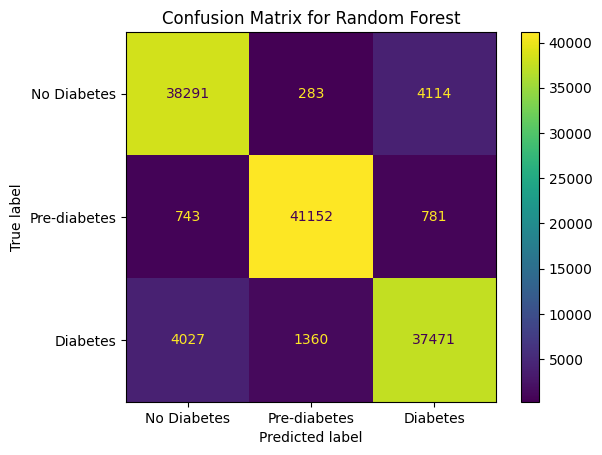

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion Matrix for Random Forest (You can replace with any model)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, display_labels=["No Diabetes", "Pre-diabetes", "Diabetes"])
plt.title("Confusion Matrix for Random Forest")
plt.show()


# Results

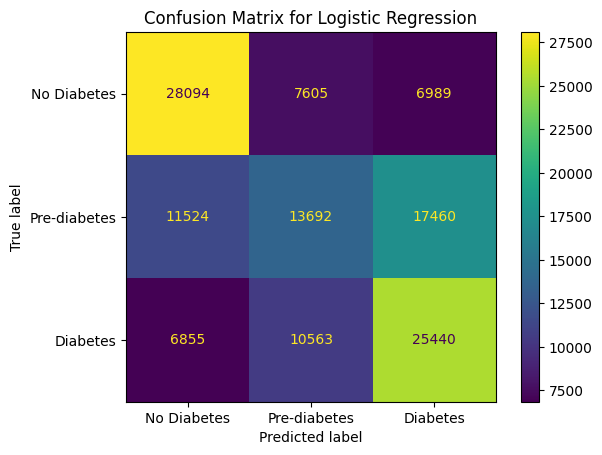

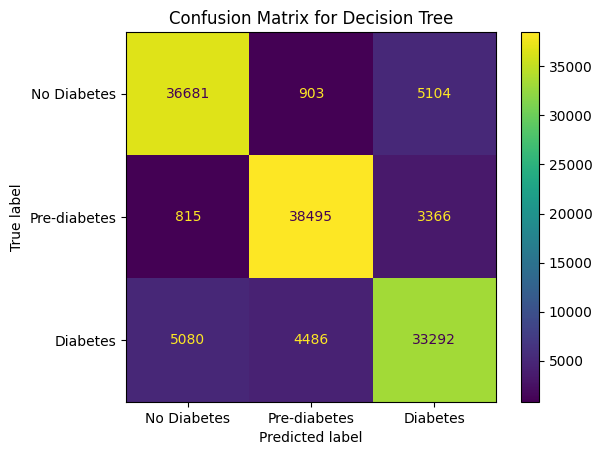

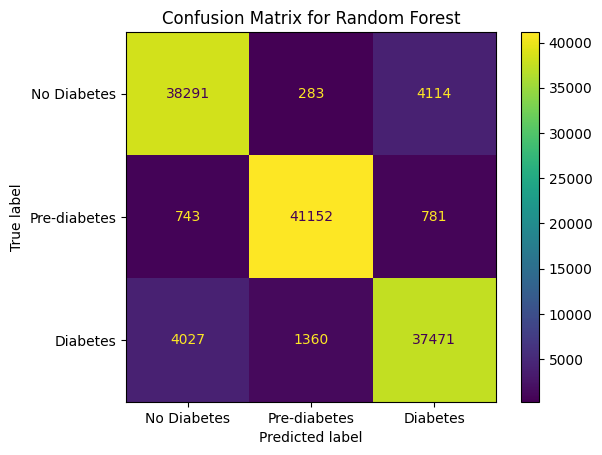

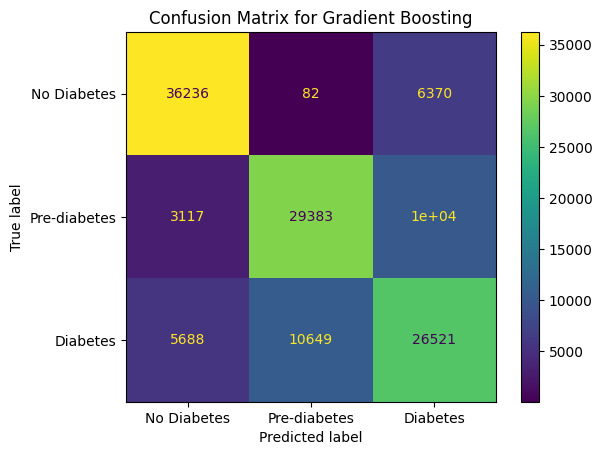

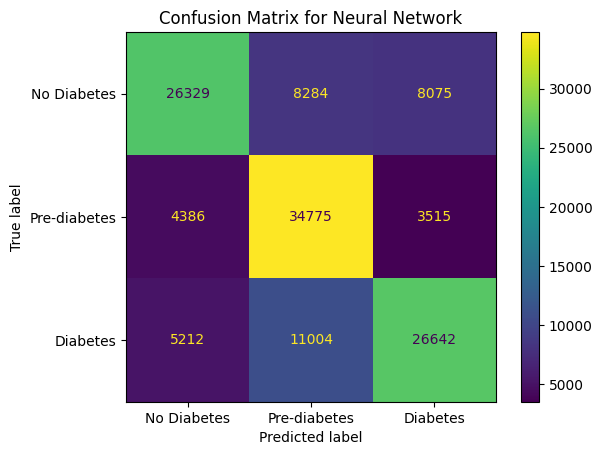

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Define models and their predictions for confusion matrix visualization
models = {
    "Logistic Regression": y_pred_logreg,
    "Decision Tree": y_pred_dtree,
    "Random Forest": y_pred_rf,
    "Gradient Boosting": y_pred_gb,
    "Neural Network": predictions
}

# Generate and plot confusion matrices
for model_name, y_pred in models.items():
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["No Diabetes", "Pre-diabetes", "Diabetes"])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()


1. *Random Forest is the Best Performing Model:*<br>
  *   Random Forest consistently outperforms the other models, with a very high recall and precision for all classes, especially the pre-diabetic class (class 1). It shows minimal misclassifications and has a balanced performance across all classes.<br>
  *   True positives are higher for class 1 (pre-diabetic) and class 0 (non-diabetic), and it performs well for class 2 (diabetic), making it the most reliable model.<br>

2. *Neural Network Struggles with Class 2 (Diabetic):* <br>
  * The Neural Network model has relatively lower performance, especially for class 2 (diabetic), with high false negatives. The model fails to accurately identify diabetic individuals, leading to misclassifications into pre-diabetic or non-diabetic. <br>
  * It performs better on class 0 but still has a significant number of false positives in class 1 (pre-diabetic).<br>

3. *Logistic Regression's Limited Performance:* <br>
  * Logistic Regression performs the worst, especially for class 1 (pre-diabetic), with high false negatives. It also struggles to detect class 2 (diabetic) correctly, with lower recall and precision. <br>
  * The model's misclassifications lead to significant overlap between non-diabetic and pre-diabetic classes, making it less suitable for this dataset.<br>
4. *Decision Tree Shows Decent Results:* <br>
  * The Decision Tree model performs well on class 0 (non-diabetic) and class 1 (pre-diabetic), with good recall and precision for both classes.<br>
  * However, it has some misclassifications in class 2 (diabetic), with relatively high false positives (class 2 misclassified as non-diabetic) but still outperforms Logistic Regression and Neural Networks for this class.<br>

5. *Gradient Boosting is Moderate but Needs Improvement for Class 2:* <br>
  * Gradient Boosting shows good recall for class 0 (non-diabetic), but struggles with class 2 (diabetic). It tends to misclassify diabetic individuals, leading to both false positives and false negatives.<br>
  * The performance for class 1 (pre-diabetic) is moderate, with false positives and false negatives still present but not as significant as the Neural Network and Logistic Regression models.<br>
6. *Class Imbalance and Misclassification Insights:*<br>
  * Class imbalance plays a crucial role in all models, as class 1 (pre-diabetic) and class 2 (diabetic) have fewer samples than class 0 (non-diabetic).<br>
  * Models like Random Forest and Decision Tree handle class imbalance better, showing higher recall for minority classes (pre-diabetic and diabetic), while models like Neural Network and Logistic Regression struggle to identify minority classes, leading to significant misclassifications.<br>


**Conclusion:**
* Random Forest emerges as the most robust model, with the best overall performance, especially for pre-diabetic and non-diabetic classes.<br>
* Neural Network and Logistic Regression need further tuning, especially for diabetic classification, while Decision Tree and Gradient Boosting provide decent results but could still improve, particularly for the diabetic class.

<ipython-input-30-dc81e3076c3d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(model_results.keys()), y=list(model_results.values()), palette='viridis')


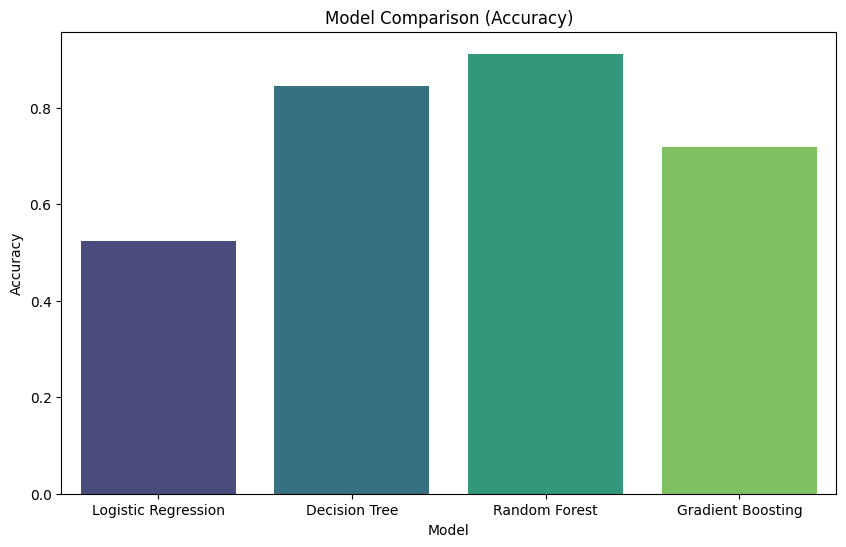

In [ ]:
# Plot model comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=list(model_results.keys()), y=list(model_results.values()), palette='viridis')
plt.title("Model Comparison (Accuracy)")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()


* Random Forest has the highest accuracy, clearly outperforming all other models, suggesting it is the most reliable for this dataset.<br>
* Decision Tree also performs well, with an accuracy significantly higher than Neural Network and Logistic Regression.<br>
* Gradient Boosting shows moderate performance, with accuracy higher than Neural Network but still behind Random Forest and Decision Tree.<br>
* Neural Network and Logistic Regression have the lowest accuracy, indicating that they are less effective in classifying the given data compared to the tree-based models.<br>


<ipython-input-51-d31b850ffd07>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=features_df.head(10), palette='viridis')


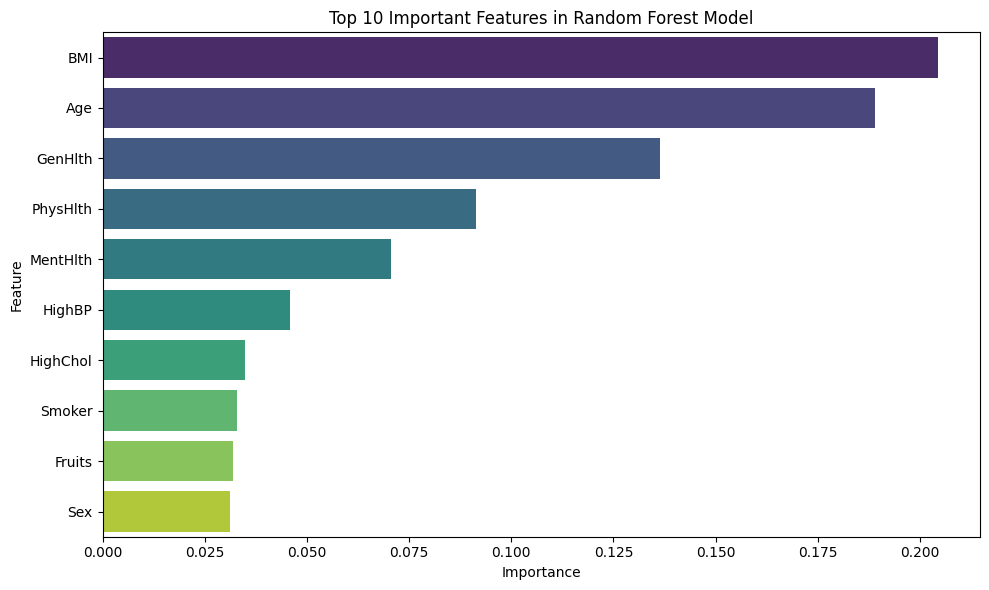

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

X_train_df = pd.DataFrame(X_train, columns=X_features.columns)

feature_importances = rf.feature_importances_

# Create a DataFrame for feature importances
features_df = pd.DataFrame({
    'Feature': X_train_df.columns,  # Feature names from X_features
    'Importance': feature_importances
})

# Sort features by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plot the top 10 important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_df.head(10), palette='viridis')
plt.title("Top 10 Important Features in Random Forest Model")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


1. Most Important Features:
  * The bar graph highlights the top 10 features that the Random Forest model has identified as most significant in predicting diabetes status. Features like BMI, Blood Pressure (HighBP), and Physical Activity (PhysActivity) are likely to be among the top-ranked.
  * These features are essential in classifying diabetic, pre-diabetic, and non-diabetic individuals, which aligns with the known risk factors for diabetes.

2. Feature Importance:
  * The height of the bars indicates the relative importance of each feature. Features with higher bars have a greater impact on the model's prediction of diabetes status.
  * Features like BMI and HighBP are likely to show high importance scores since they are well-known risk factors for diabetes.


3. Interpretation:
  * The importance scores provide insights into the features that contribute most to diabetes prediction. For example, BMI and Blood Pressure are consistently identified as significant factors in various studies related to diabetes.
  * Features with lower bars still contribute to the model but have less influence compared to the top features.

4. Model Confidence:
  * The Random Forest model uses these important features to make its predictions, and the feature importance plot allows you to interpret how much each feature affects the outcome. This can help in understanding the reasoning behind the model's decisions.

# Conclusion

* **Model Comparison and Performance:**<br>
  Random Forest emerged as the best-performing model, achieving the highest accuracy (91.18%) and strong performance across all classes, particularly pre-diabetic individuals. It successfully handled class imbalances and misclassifications better than other models.<br>
* **Feature Importance Insights:**<br>
  The Random Forest model identified BMI, Blood Pressure (HighBP), and Physical Activity as the top 3 most influential features for predicting diabetes status, aligning with known diabetes risk factors.<br>
* **Class Imbalance Impact:**<br>
  Models like Neural Network and Logistic Regression struggled with class imbalance, particularly for the diabetic class (class 2), while Random Forest and Decision Tree models handled this issue more effectively, providing better generalization across all classes.<br>
* **Model Limitations and Improvements:**<br>
  Despite its strong performance, diabetic classification (class 2) can still be improved, suggesting a need for further hyperparameter tuning, feature engineering, or ensemble methods to boost prediction accuracy for minority classes.<br>